In [1]:
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

2.3.0


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete004HTO/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete004HTO/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete004HTO/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

##Single Layer LSTM

In [3]:
embedding_dim = 64
model_1 = tf.keras.Sequential([
                tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.summary()
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [4]:
num_epochs = 10
history_1 = model_1.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset )

Epoch 1/10
391/391 [==============================] - 69s 176ms/step - loss: 0.6579 - accuracy: 0.6108 - val_loss: 0.6871 - val_accuracy: 0.6016
Epoch 2/10
391/391 [==============================] - 69s 177ms/step - loss: 0.5904 - accuracy: 0.6936 - val_loss: 0.6314 - val_accuracy: 0.6318
Epoch 3/10
391/391 [==============================] - 69s 177ms/step - loss: 0.4825 - accuracy: 0.7771 - val_loss: 0.5876 - val_accuracy: 0.7328
Epoch 4/10
391/391 [==============================] - 69s 177ms/step - loss: 0.3443 - accuracy: 0.8562 - val_loss: 0.3982 - val_accuracy: 0.8204
Epoch 5/10
391/391 [==============================] - 69s 177ms/step - loss: 0.2569 - accuracy: 0.8995 - val_loss: 0.3646 - val_accuracy: 0.8425
Epoch 6/10
391/391 [==============================] - 69s 177ms/step - loss: 0.2058 - accuracy: 0.9210 - val_loss: 0.3980 - val_accuracy: 0.8556
Epoch 7/10
391/391 [==============================] - 69s 176ms/step - loss: 0.1667 - accuracy: 0.9395 - val_loss: 0.3901 - val_ac

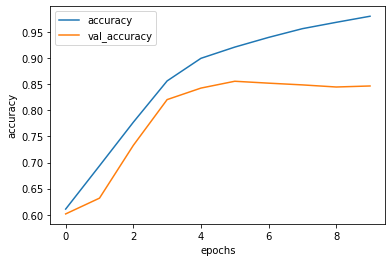

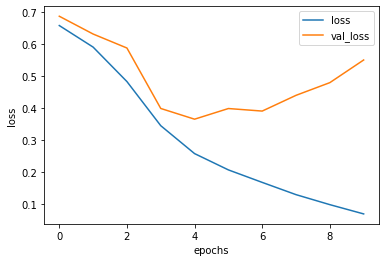

In [5]:
plot_graphs(history_1, 'accuracy')
plot_graphs(history_1, 'loss')

##Multilayer LSTM

In [10]:
embedding_dim = 64
model_2 = tf.keras.Sequential([
                tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                # Because the next layer is an lstm and the output of this layer should match
                # the input of teh next layer
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_2 = model_2.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 138s 354ms/step - loss: 0.6132 - accuracy: 0.6586 - val_loss: 0.5815 - val_accuracy: 0.7420
Epoch 2/10
391/391 [==============================] - 140s 358ms/step - loss: 0.5846 - accuracy: 0.7038 - val_loss: 0.5810 - val_accuracy: 0.6988
Epoch 3/10
391/391 [==============================] - 140s 359ms/step - loss: 0.5434 - accuracy: 0.7528 - val_loss: 0.5218 - val_accuracy: 0.7701
Epoch 4/10
391/391 [==============================] - 141s 359ms/step - loss: 0.5133 - accuracy: 0.7760 - val_loss: 0.5451 - val_accuracy: 0.7553
Epoch 5/10
391/391 [==============================] - 141s 360ms/step - loss: 0.5197 - accuracy: 0.7562 - val_loss: 0.4974 - val_accuracy: 0.7522
Epoch 6/10
391/391 [==============================] - 140s 359ms/step - loss: 0.4055 - accuracy: 0.8273 - val_loss: 0.5287 - val_accuracy: 0.7618
Epoch 7/10
391/391 [==============================] - 141s 361ms/step - loss: 0.3464 - accuracy: 0.8589 - val_loss: 0.3731 -

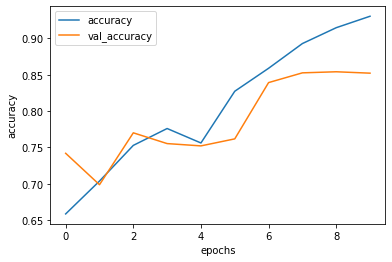

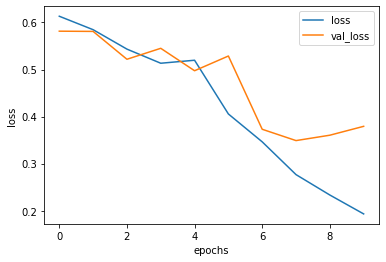

In [12]:
plot_graphs(history_2, 'accuracy')
plot_graphs(history_2, 'loss')

## GRU

In [13]:
embedding_dim = 64
model_3 = tf.keras.Sequential([
                tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.summary()
model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               49920     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 582,081
Trainable params: 582,081
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_3 = model_3.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 68s 173ms/step - loss: 0.6365 - accuracy: 0.6200 - val_loss: 0.6940 - val_accuracy: 0.5005
Epoch 2/10
391/391 [==============================] - 68s 173ms/step - loss: 0.5687 - accuracy: 0.6801 - val_loss: 0.4838 - val_accuracy: 0.7742
Epoch 3/10
391/391 [==============================] - 68s 173ms/step - loss: 0.3179 - accuracy: 0.8652 - val_loss: 0.3213 - val_accuracy: 0.8684
Epoch 4/10
391/391 [==============================] - 68s 173ms/step - loss: 0.2311 - accuracy: 0.9091 - val_loss: 0.3136 - val_accuracy: 0.8697
Epoch 5/10
391/391 [==============================] - 67s 172ms/step - loss: 0.1899 - accuracy: 0.9289 - val_loss: 0.3332 - val_accuracy: 0.8684
Epoch 6/10
391/391 [==============================] - 68s 174ms/step - loss: 0.1633 - accuracy: 0.9375 - val_loss: 0.3724 - val_accuracy: 0.8582
Epoch 7/10
391/391 [==============================] - 68s 174ms/step - loss: 0.1311 - accuracy: 0.9528 - val_loss: 0.4071 - val_ac

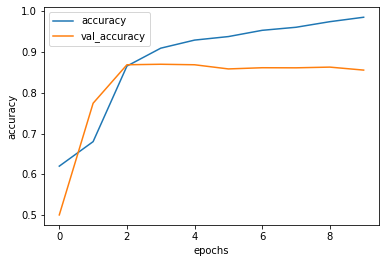

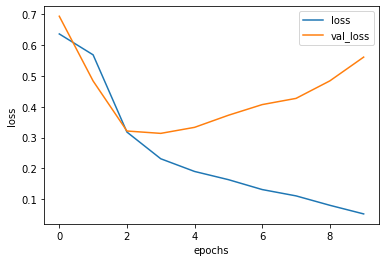

In [15]:
plot_graphs(history_3, 'accuracy')
plot_graphs(history_3, 'loss')

##Convolution

In [16]:
embedding_dim = 64
model_4 = tf.keras.Sequential([
                tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                tf.keras.layers.Conv1D(128, 5, activation='relu'),
                tf.keras.layers.GlobalAveragePooling1D(),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.summary()
model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_4 = model_4.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 34s 86ms/step - loss: 0.4515 - accuracy: 0.7738 - val_loss: 0.3148 - val_accuracy: 0.8688
Epoch 2/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2236 - accuracy: 0.9154 - val_loss: 0.3025 - val_accuracy: 0.8790
Epoch 3/10
391/391 [==============================] - 20s 50ms/step - loss: 0.1672 - accuracy: 0.9385 - val_loss: 0.3333 - val_accuracy: 0.8707
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1352 - accuracy: 0.9514 - val_loss: 0.3708 - val_accuracy: 0.8705
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1089 - accuracy: 0.9625 - val_loss: 0.4202 - val_accuracy: 0.8601
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0906 - accuracy: 0.9691 - val_loss: 0.4940 - val_accuracy: 0.8622
Epoch 7/10
391/391 [==============================] - 18s 47ms/step - loss: 0.0675 - accuracy: 0.9798 - val_loss: 0.5630 - val_accuracy:

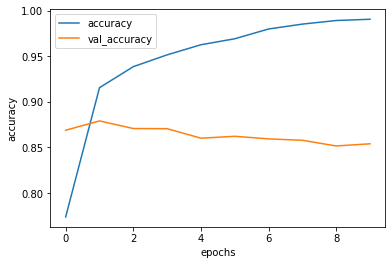

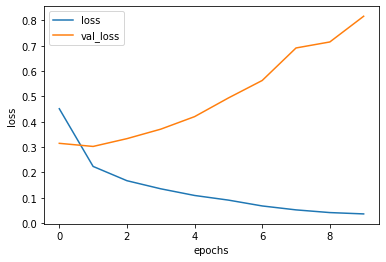

In [19]:
plot_graphs(history_4, 'accuracy')
plot_graphs(history_4, 'loss')